# Principal Component Analysis
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. Please check the pdf file for more details.*

In this exercise you will:
    
- implement **Principal Component Analysis** and apply it to **restore rotated CAPTCHA**
- play with **Eigenface** by applying PCA on a real world face dataset
- use PCA to do **dimension reduction**. Evaluate the loss of information qualitatively and quantitatively

Please note that **YOU CANNOT USE ANY MACHINE LEARNING PACKAGE SUCH AS SKLEARN** for any homework, unless you are asked to.

In [28]:
# some basic imports
import scipy.io as sio
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import math

%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Now let's hack the rotated CAPTCHA!

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


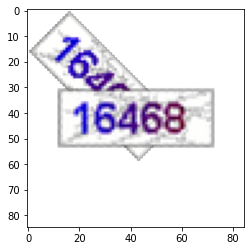

In [24]:
from hack_pca import hack_pca

filename = '3.gif'

img_r = plt.imread(filename)
plt.imshow(img_r)

# Hack different images yourself
img = hack_pca(filename)

plt.imshow(img)

## Apply PCA on face image

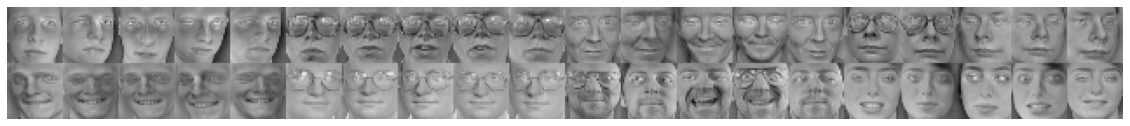

In [29]:
# load data
ORL_data = sio.loadmat('ORL_data.mat')
fea_Train = ORL_data['fea_Train']
gnd_Train = ORL_data['gnd_Train'].reshape(-1)
fea_Test = ORL_data['fea_Test']
gnd_Test = ORL_data['gnd_Test'].reshape(-1)
# YOUR CODE HERE

# 1. Feature preprocessing
# begin answer
fea_Train = stats.zscore(fea_Train)
fea_Test = stats.zscore(fea_Test)
# end answer
from show_face import show_face
show_face(fea_Train)

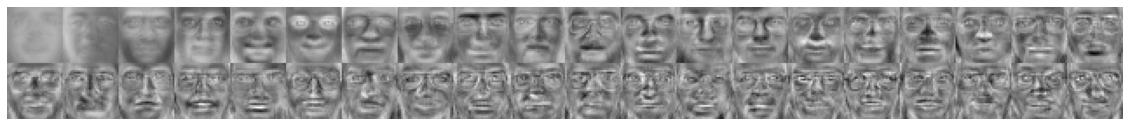

In [31]:
# 2. Run PCA
# begin answer
from pca import PCA
_, eigvector = PCA(fea_Train)
# end answer
# 3. Visualize eigenface
# begin answer
show_face(eigvector.T)
# end answer

dimensionality: 8, testing error rate: 0.26
dimensionality: 16, testing error rate: 0.185
dimensionality: 32, testing error rate: 0.145
dimensionality: 64, testing error rate: 0.12
dimensionality: 128, testing error rate: 0.125


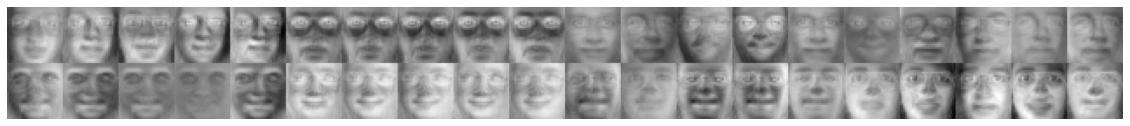

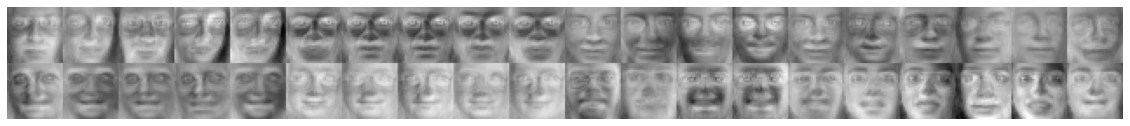

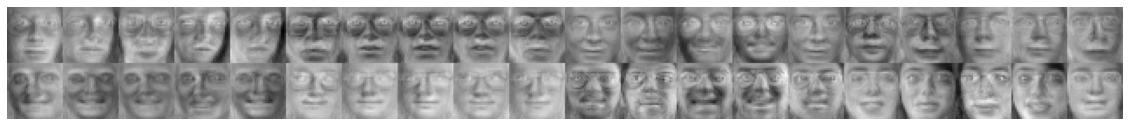

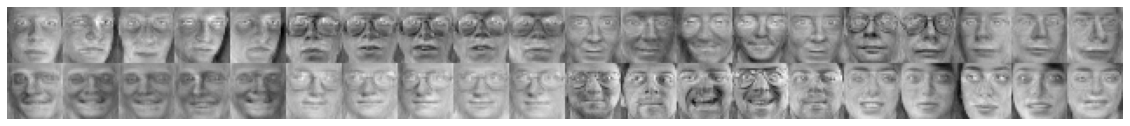

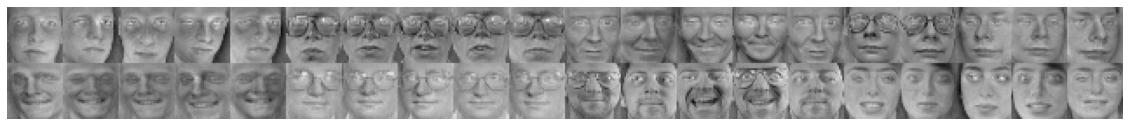

In [36]:
# 4. Project data on to low dimensional space
# 5. Run KNN in low dimensional space
# 6. Recover face images form low dimensional space, visualize them
# begin answer
from knn import knn
dims = [8, 16, 32, 64, 128]
for dim in dims:
    eigvec = eigvector[:, :dim]
    x_train = np.matmul(fea_Train, eigvec)
    x_test = np.matmul(fea_Test, eigvec)
    predict = knn(x_test, x_train, gnd_Train, 1)
    test_error = np.sum(predict != gnd_Test) / gnd_Test.shape[0]
    print('dimensionality: {}, testing error rate: {}'.format(dim, test_error))
    recovered = np.matmul(x_train, eigvec.T)
    show_face(recovered) 

# end answer

## You are encouraged to apply LDA on this dataset!

In [40]:
from LDA import LDA

# Your code here
# begin answer
_, eigvector = LDA(fea_Train, gnd_Train)
for dim in dims:
    eigvec = eigvector[:, :dim]
    x_train = np.matmul(fea_Train, eigvec)
    x_test = np.matmul(fea_Test, eigvec)
    predict = knn(x_test, x_train, gnd_Train, 1)
    test_error = np.sum(predict != gnd_Test) / gnd_Test.shape[0]
    print('dimensionality: {}, testing error rate: {}'.format(dim, test_error))    
# end answer

dimensionality: 8, testing error rate: 0.26
dimensionality: 16, testing error rate: 0.2
dimensionality: 32, testing error rate: 0.13
dimensionality: 64, testing error rate: 0.09
dimensionality: 128, testing error rate: 0.06
